## Notes on Handling Images and a Simple Binary Classification Task Using Synthetic Data [For Educational Purposes Only]


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import tensorflow as tf
import keras

In [8]:
ImagesPath = "/content/drive/MyDrive/Hesham Haroon Course/Day 05/Images"
Images = os.listdir(ImagesPath)

In [11]:
len(Images)

250

In [9]:
Images[0]

'59.jpg'

array([[[34, 30, 25],
        [34, 30, 25],
        [34, 30, 25],
        ...,
        [24, 19, 16],
        [24, 19, 16],
        [24, 19, 16]],

       [[35, 31, 26],
        [35, 31, 26],
        [35, 31, 26],
        ...,
        [24, 19, 16],
        [24, 19, 16],
        [24, 19, 16]],

       [[38, 32, 27],
        [37, 31, 26],
        [38, 32, 27],
        ...,
        [24, 19, 16],
        [24, 19, 16],
        [24, 19, 16]],

       ...,

       [[71, 61, 51],
        [70, 60, 50],
        [69, 59, 49],
        ...,
        [ 5,  5,  5],
        [ 5,  5,  5],
        [ 4,  4,  4]],

       [[70, 60, 50],
        [70, 60, 50],
        [69, 59, 49],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[70, 60, 50],
        [69, 59, 49],
        [69, 59, 49],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)
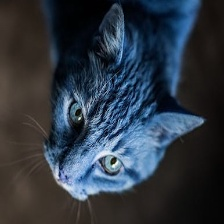

In [12]:
img = cv2.imread(os.path.join(ImagesPath, Images[0]))
img

In [16]:
img[0]

array([[ 34,  30,  25],
       [ 34,  30,  25],
       [ 34,  30,  25],
       [ 34,  30,  25],
       [ 36,  30,  25],
       [ 35,  29,  24],
       [ 35,  29,  24],
       [ 35,  29,  24],
       [ 35,  29,  24],
       [ 34,  28,  23],
       [ 35,  26,  22],
       [ 36,  27,  23],
       [ 38,  29,  25],
       [ 39,  30,  26],
       [ 38,  29,  25],
       [ 37,  28,  24],
       [ 37,  28,  24],
       [ 38,  29,  25],
       [ 38,  29,  25],
       [ 37,  28,  24],
       [ 38,  29,  25],
       [ 39,  30,  26],
       [ 38,  29,  25],
       [ 37,  28,  24],
       [ 37,  28,  24],
       [ 37,  28,  24],
       [ 34,  28,  23],
       [ 33,  27,  22],
       [ 33,  27,  22],
       [ 33,  27,  22],
       [ 33,  27,  22],
       [ 33,  27,  22],
       [ 31,  27,  22],
       [ 32,  28,  23],
       [ 36,  30,  25],
       [ 37,  31,  26],
       [ 35,  30,  29],
       [ 36,  31,  30],
       [ 38,  33,  35],
       [ 39,  36,  38],
       [ 40,  38,  44],
       [ 38,  40

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
img.shape

(224, 224)

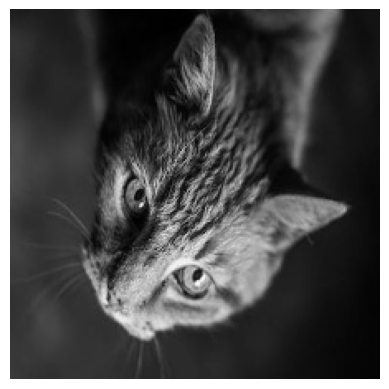

In [25]:
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [27]:
for i in range(10):
  img = cv2.imread(os.path.join(ImagesPath, np.random.choice(Images)))
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

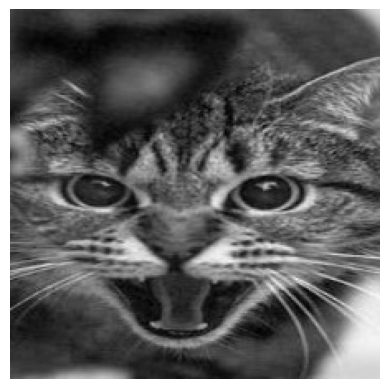

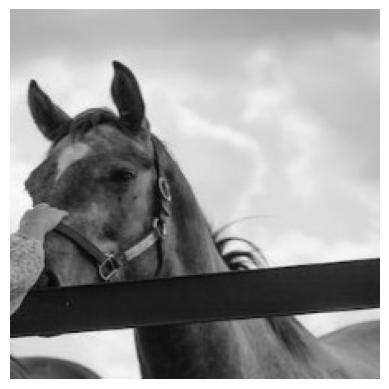

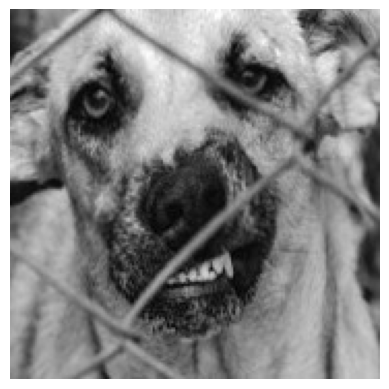

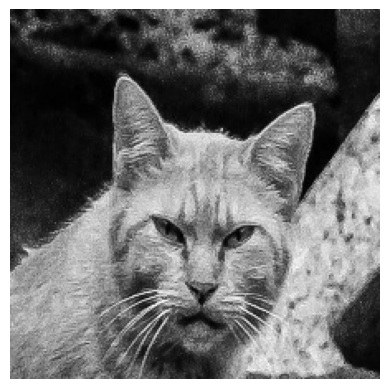

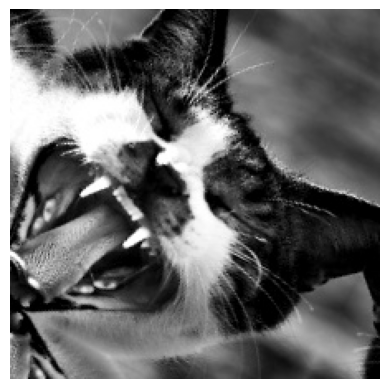

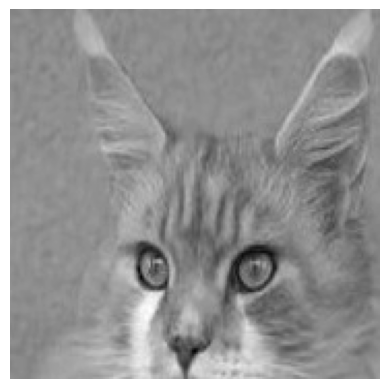

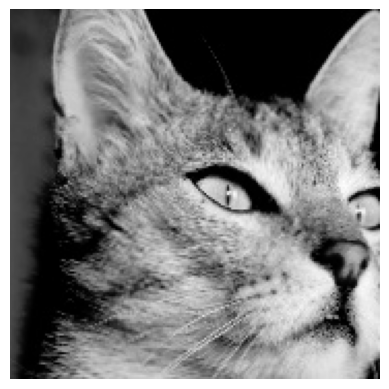

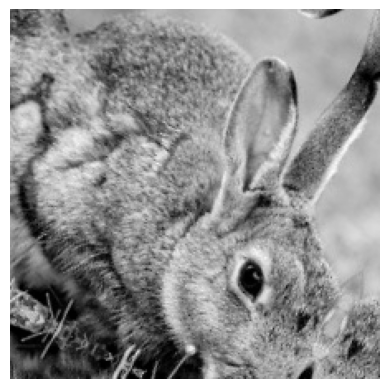

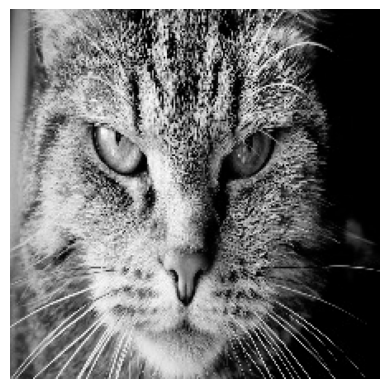

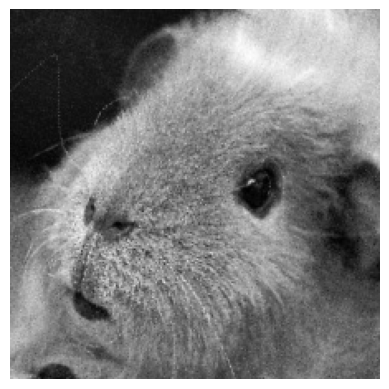

In [35]:
for i in range(10):
  img = cv2.imread(os.path.join(ImagesPath, np.random.choice(Images)))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

In [41]:
ImagesShape = set()
for img in Images:
  img_full_path = os.path.join(ImagesPath, img)
  img = cv2.imread(img_full_path)
  ImagesShape.add(img.shape)

In [42]:
len(ImagesShape)

2

In [43]:
for shape in ImagesShape:
  print(shape)

(179, 179, 3)
(224, 224, 3)


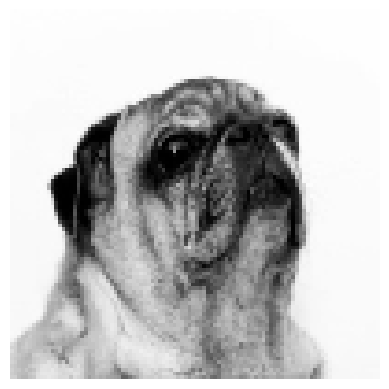

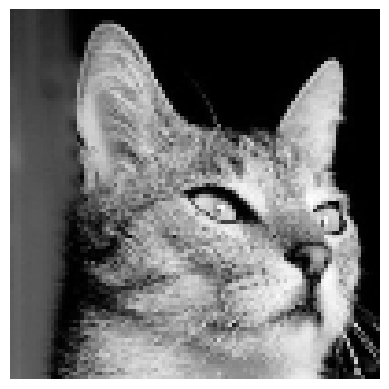

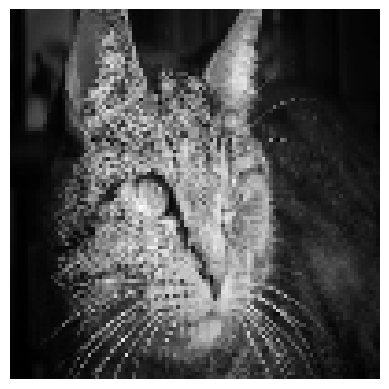

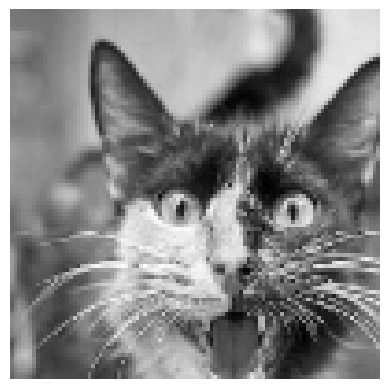

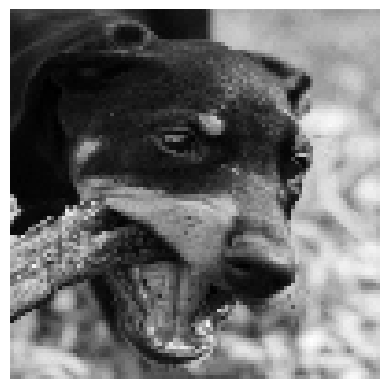

In [51]:
size = 100
for i in range(5):
  img = cv2.imread(os.path.join(ImagesPath, np.random.choice(Images)))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (size, size))
  plt.imshow(img, cmap="gray")
  plt.axis("off")
  plt.show()

In [57]:
print(img.shape)

(100, 100)


In [58]:
img = img.reshape(100, 100, 1)
img.shape

(100, 100, 1)

In [59]:
ImagesArray = []
for img in Images:
  img_full_path = os.path.join(ImagesPath, img)
  img = cv2.imread(img_full_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (size, size))
  img = img.reshape(size, size, 1)
  ImagesArray.append(img)
len(ImagesArray)

250

In [61]:
ImagesArray[0]

array([[[30],
        [30],
        [28],
        ...,
        [19],
        [19],
        [19]],

       [[32],
        [32],
        [30],
        ...,
        [19],
        [19],
        [19]],

       [[34],
        [34],
        [32],
        ...,
        [19],
        [19],
        [19]],

       ...,

       [[56],
        [55],
        [54],
        ...,
        [ 5],
        [ 5],
        [ 4]],

       [[58],
        [56],
        [55],
        ...,
        [ 5],
        [ 5],
        [ 4]],

       [[58],
        [56],
        [55],
        ...,
        [ 4],
        [ 4],
        [ 4]]], dtype=uint8)

In [74]:
y = np.random.choice([0, 1], size = len(ImagesArray))
y

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0])

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(ImagesArray), np.array(y), test_size=0.2, random_state=42, shuffle=True)

print("x train shape: ", x_train.shape)
print("x test shape: ", x_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

x train shape:  (200, 100, 100, 1)
x test shape:  (50, 100, 100, 1)
y train shape:  (200,)
y test shape:  (50,)


In [90]:
KerasModel = keras.models.Sequential(
    [
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="valid", input_shape = (size, size, 1)),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="valid"),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = tf.nn.relu ),
        keras.layers.Dense(1, activation = tf.nn.sigmoid )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
KerasModel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [93]:
KerasModel.fit(x_train, y_train, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.4962 - loss: 5.5117
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.6183 - loss: 2.2229
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.7832 - loss: 1.3369
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.8525 - loss: 0.3846
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 319ms/step - accuracy: 0.9104 - loss: 0.2638
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - accuracy: 0.9423 - loss: 0.2388
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 0.9534 - loss: 0.2136
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - accuracy: 0.9685 - loss: 0.2286
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.9502 - loss: 0.3363
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.9345 - loss: 0.2264


In [94]:
KerasModel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 49, 49, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,530,341 (24.91 MB)

 Trainable params: 2,176,737 (8.30 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 4,353,476 (16.61 MB)